### Solution to a)

In [2]:
import numpy as np # to make use of mathematical functions and arrays
import matplotlib.pyplot as plt # for plotting
import treecorr as tc # to calculate 2pacf

In [3]:
fluxyN = []; fluxy = []; fluxyRev = []; fluxyR = []
numRings=10
numThts=20
thts = [np.pi*ii/numThts for ii in range(2*numThts+1)];
rs = [2*ii/numRings for ii in range(1,numRings+1)]
for r in rs:
    for tht in thts:
        fluxy.append([r*np.cos(tht),r*np.sin(tht),-r*np.sin(tht),r*np.cos(tht)])
        fluxyN.append([r*np.cos(tht),r*np.sin(tht),-np.sin(tht),np.cos(tht)])
        fluxyR.append([r*np.cos(tht),r*np.sin(tht),np.cos(tht)/r,np.sin(tht)/r])
        fluxyRev.append([r*np.cos(tht),r*np.sin(tht),np.sin(tht),-np.cos(tht)])

In [4]:
# **do not mind this cell, it is just for plotting**
def plotpnts (cat,xlim,ylim,boxsize=2,arrow=False,tag=None,scale=2,annotate=True,title=False,w=1,normalized=True,centered=True):
    #tag=[beta,alpha]
    plt.figure(figsize=(scale,scale));alen=boxsize/15;awidth=w*boxsize/200;aoffset=boxsize/30;n=len(cat);labels=[];
    if title: plt.title(title,fontsize=14)
    for ii in range(n):
        labels.append("p"+str(ii)); plt.plot(np.transpose(cat)[0],np.transpose(cat)[1],linestyle="none",marker=".",markersize=1,c="gray",alpha=.4)
    for ii,label in enumerate(labels):
        if arrow:
            anorm=np.linalg.norm([np.transpose(cat)[2][ii],np.transpose(cat)[3][ii]])+10**(-5)
            if normalized:
                dx=np.transpose(cat)[2][ii]*alen/anorm;
                dy=np.transpose(cat)[3][ii]*alen/anorm;
            else:
                dx=np.transpose(cat)[2][ii];
                dy=np.transpose(cat)[3][ii];
            if anorm > 0:
                if centered:
                    plt.arrow(np.transpose(cat)[0][ii]-dx/2,np.transpose(cat)[1][ii]-dy/2,dx,dy,width=awidth,\
                              fc="gray",ec="none",head_width=awidth/100)
                if not centered:
                    plt.arrow(np.transpose(cat)[0][ii],np.transpose(cat)[1][ii],dx,dy,width=awidth,\
                              fc="gray",ec="none",head_width=awidth/100)
                if annotate:plt.annotate(label,(np.transpose(cat)[0][ii],np.transpose(cat)[1][ii]),\
                     xytext=(np.transpose(cat)[0][ii]+aoffset+np.transpose(cat)[2][ii]*alen/anorm,\
                         np.transpose(cat)[1][ii]+aoffset+np.transpose(cat)[3][ii]*alen/anorm))                  
        else: plt.annotate(label,(np.transpose(cat)[0][ii],np.transpose(cat)[1][ii]),\
                     xytext=(np.transpose(cat)[0][ii]+.05,np.transpose(cat)[1][ii]+.05))
    plt.xlim(xlim[0],xlim[1]); plt.ylim(ylim[0],ylim[1])
    plt.xlabel("RA [rad]"); plt.ylabel("DEC [rad]")
    if tag:
        plt.text(-boxsize*2/5 ,boxsize*3/5,"beta="+str(tag[0])[:4]+" deg"+"\nphi="+str(tag[1])[:4]+" deg")
    plt.show()
    pass

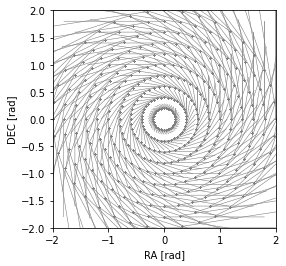

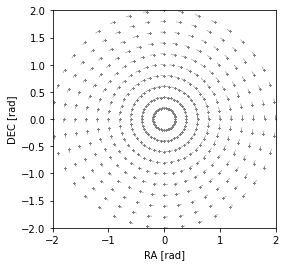

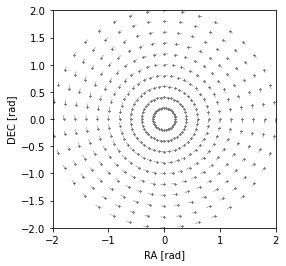

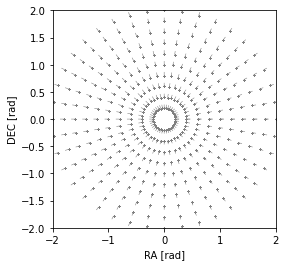

In [6]:
plotpnts(fluxy,[-2,2],[-2,2],arrow=True,boxsize=1,w=2,annotate=False,normalized=False,centered=False,scale=4)
plotpnts(fluxyN,[-2,2],[-2,2],arrow=True,boxsize=1,w=2,annotate=False,normalized=True,centered=False,scale=4)
plotpnts(fluxyRev,[-2,2],[-2,2],arrow=True,boxsize=1,w=2,annotate=False,normalized=True,centered=False,scale=4)
plotpnts(fluxyR,[-2,2],[-2,2],arrow=True,boxsize=1,w=2,annotate=False,normalized=True,centered=False,scale=4)

In [7]:
nrbinF=12;minrF=.1;maxrF=4
catalogF=tc.Catalog(ra=np.transpose(fluxy)[0],dec=np.transpose(fluxy)[1],g1=np.transpose(fluxy)[2],g2=np.transpose(fluxy)[3],ra_units="deg",dec_units="deg")
ggcorrF=tc.GGCorrelation(nbins=nrbinF,min_sep=minrF,max_sep=maxrF,sep_units="deg")
ggcorrF.process(catalogF)
# normalized
catalogFN=tc.Catalog(ra=np.transpose(fluxyN)[0],dec=np.transpose(fluxyN)[1],g1=np.transpose(fluxyN)[2],g2=np.transpose(fluxyN)[3],ra_units="deg",dec_units="deg")
ggcorrFN=tc.GGCorrelation(nbins=nrbinF,min_sep=minrF,max_sep=maxrF,sep_units="deg")
ggcorrFN.process(catalogFN)
# reversed
catalogFRev=tc.Catalog(ra=np.transpose(fluxyRev)[0],dec=np.transpose(fluxyRev)[1],g1=np.transpose(fluxyRev)[2],g2=np.transpose(fluxyRev)[3],ra_units="deg",dec_units="deg")
ggcorrFRev=tc.GGCorrelation(nbins=nrbinF,min_sep=minrF,max_sep=maxrF,sep_units="deg")
ggcorrFRev.process(catalogFRev)

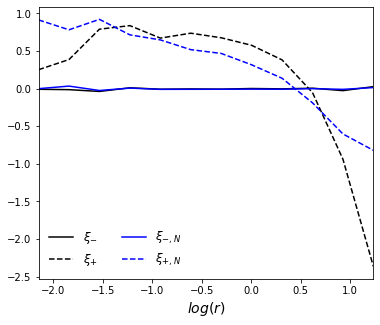

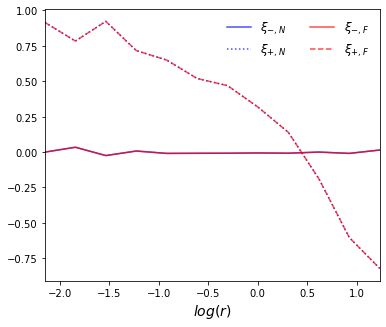

In [8]:
plt.figure(figsize=(6,5))
plt.plot(ggcorrF.logr,ggcorrF.xim,markersize=6,label="$\\xi_{-}$",c="black")
plt.plot(ggcorrF.logr,ggcorrF.xip,markersize=6,label="$\\xi_{+}$",c="black",linestyle="dashed")
plt.plot(ggcorrF.logr,ggcorrFN.xim,markersize=6,label="$\\xi_{-,N}$",c="blue")
plt.plot(ggcorrF.logr,ggcorrFN.xip,markersize=6,label="$\\xi_{+,N}$",c="blue",linestyle="dashed")
plt.legend(frameon=False,fontsize=12,ncol=2)
plt.xlim([min(ggcorrF.logr),max(ggcorrF.logr)]);plt.xlabel("$log(r)$",fontsize=14)
plt.show()

plt.figure(figsize=(6,5))
plt.plot(ggcorrF.logr,ggcorrFN.xim,markersize=6,label="$\\xi_{-,N}$",c="blue",alpha=.7)
plt.plot(ggcorrF.logr,ggcorrFN.xip,markersize=8,label="$\\xi_{+,N}$",c="blue",linestyle="dotted",alpha=.7)
plt.plot(ggcorrF.logr,ggcorrFRev.xim,markersize=6,label="$\\xi_{-,F}$",c="red",alpha=.7)
plt.plot(ggcorrF.logr,ggcorrFRev.xip,markersize=8,label="$\\xi_{+,F}$",c="red",linestyle="dashed",alpha=.7)
plt.legend(frameon=False,fontsize=12,ncol=2)
plt.xlim([min(ggcorrF.logr),max(ggcorrF.logr)]);plt.xlabel("$log(r)$",fontsize=14)
plt.show()

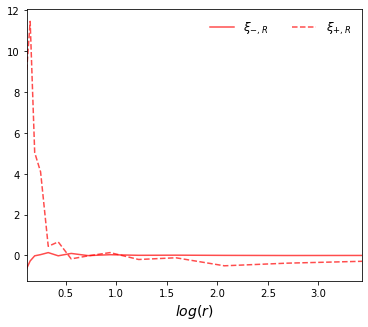

In [9]:
# radial
nrbinF=14;minrF=.1;maxrF=4
catalogFR=tc.Catalog(ra=np.transpose(fluxyR)[0],dec=np.transpose(fluxyR)[1],g1=np.transpose(fluxyR)[2],g2=np.transpose(fluxyR)[3],ra_units="deg",dec_units="deg")
ggcorrFR=tc.GGCorrelation(nbins=nrbinF,min_sep=minrF,max_sep=maxrF,sep_units="deg")
ggcorrFR.process(catalogFR)
plt.figure(figsize=(6,5))
plt.plot(ggcorrFR.rnom,ggcorrFR.xim,markersize=6,label="$\\xi_{-,R}$",c="red",alpha=.7)
plt.plot(ggcorrFR.rnom,ggcorrFR.xip,markersize=8,label="$\\xi_{+,R}$",c="red",linestyle="dashed",alpha=.7)
plt.legend(frameon=False,fontsize=12,ncol=2)
plt.xlim([min(ggcorrF.rnom),max(ggcorrF.rnom)]);plt.xlabel("$log(r)$",fontsize=14)
plt.show()